In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('judi_online_.xlsx')
df = df.drop(columns=['id', 'date', 'author_channel_url', 'edited_date', 'direct_reply_to', 'type'])
df.sort_values(by='likes', ascending=False)

,author,text,author_channel_id,parent_post_id,parent_username,likes
3845,kevin,undang jonathan liandi sebagai lanjutan dari i...,UCEkAQmhBQl6iyMk1xZvdTDQ,NaN,NaN,3330
4294,Ben Vino,"Setuju gw om ded,pemain mobile legend yang uda...",UCjG3aZYRMr5PDFektbG0tnA,NaN,NaN,2598
0,Deddy Corbuzier,Tiktok.. Yes or No..?,UCYk4LJI0Pr6RBDWowMm-KUw,NaN,NaN,2236
1586,Yanua Budi Riyanto,"Mas deddy , \nTolong datangkan para ahli neuro...",UCL8reS6bwPKRLbkqsXjix6Q,NaN,NaN,767
4600,Rendi Ansyah,"Salut gua sama cara pikir lu bang. ""Disaat ora...",UCv761zPZ6wBnVMiPfBSEvcg,NaN,NaN,478
...,...,...,...,...,...,...
2669,Danar Hadi Pamungkas,Saya kga punya,UCbs9TPW23IBzQNXMrEPjlQA,NaN,NaN,0
2668,Acim CANSVERBAND,Bener banget klo soal Duta-Duta tetek bengek a...,UCFohz0kJ0g1WRUjRqT_WXag,NaN,NaN,0
2666,Hadi Setiono,Up,UCZkhZUZMBVONnIxdfnxqFXQ,NaN,NaN,0
2665,Hadi Setiono,Up,UCZkhZUZMBVONnIxdfnxqFXQ,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             6872 non-null   object
 1   text               6873 non-null   object
 2   author_channel_id  6874 non-null   object
 3   parent_post_id     2296 non-null   object
 4   parent_username    2296 non-null   object
 5   likes              6874 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 322.3+ KB


In [4]:
df = df.dropna(subset=['parent_post_id'])

# Mereset indeks dari DataFrame
df.reset_index(drop=True, inplace=True)

In [5]:
df

,author,text,author_channel_id,parent_post_id,parent_username,likes
0,DXNO CN,Wkakwkak,UCPrKRkVTKUuv_PUsqoxjjkQ,Ugw-ojo36RoNcoK2ACl4AaABAg,Agus Mahendra,0
1,rpztwo420.2,v vcvv v vcq v,UCQElNSbEq0PphJK1P3N3AiA,UgxIrS8EAaPquqKm7ux4AaABAg,Mie Ephen,0
2,rpztwo420.2,59:17,UCQElNSbEq0PphJK1P3N3AiA,UgxIrS8EAaPquqKm7ux4AaABAg,Mie Ephen,0
3,Hama Geyo,Sebagai influencer harusnya bisa mengajarkan y...,UC1sMZfDbHA9zklW3frBeYFQ,UgzIzrlc1e0dsropTwt4AaABAg,Wibfuu,0
4,Corn Tall 2 goal,Gak kasian kasian amat lah,UC1sMZfDbHA9zklW3frBeYFQ,UgzIzrlc1e0dsropTwt4AaABAg,Wibfuu,0
...,...,...,...,...,...,...
2291,namRiv,"Setahu gue si Fery ini staff ASN di kemenkeu, ...",UCLZEg6QhZTJIfFzfBTHEYgQ,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,4
2292,Dadan Wijaya,emg keren dah si ferry hariadi ini,UC__AI0xz21oBNiYQo0yDVJA,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,0
2293,david,gw pertama kali lihat videonya karena judulnya...,UCsBQ15gPe4HsSgAu10YNpHg,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,9
2294,Rafi Technic,Wkwk,UCWvSw1DMz8XzFl_9Rj5W0Lw,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,1


In [6]:
# Inisialisasi graf
G = nx.Graph()

# Menambahkan simpul
for index, row in df.iterrows():
    G.add_node(row['author_channel_id'])
    G.add_node(row['parent_post_id'])
    G.add_edge(row['author_channel_id'], row['parent_post_id'])  

print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))



Number of nodes 1963
Number of edges 1730
Average degree 1.7626082526744777


In [7]:
# Inisialisasi graf
G = nx.from_pandas_edgelist(df, source='author_channel_id', target='parent_post_id', create_using=nx.DiGraph())

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Membuat DataFrame dari degree centrality
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['User', 'Degree Centrality'])

# Mengalikan dengan kolom 'likes'
df_degree_centrality['Degree Centrality'] *= df['likes']

# Mengurutkan hasil
df_degree_centrality.sort_values('Degree Centrality', ascending=False, inplace=True)
df_degree_centrality.reset_index(drop=True, inplace=True)

# Menampilkan hasil
df_degree_centrality.head(10)


,User,Degree Centrality
0,Ugycm1IzMCoQpFytvYl4AaABAg,0.530581
1,UCgnbO_bvxdUf69_WnVUmXmw,0.107543
2,UC6IqJRORoTWPK0XscVcTPoA,0.051988
3,UC3D6gBOz1hmqsVv99PIo4vA,0.040775
4,UChA8iuWdEfN3Cpj4hRaIsFw,0.036697
5,UCGuE-S21Y4dwkkzcaiF_AnQ,0.036188
6,UCkx6d7k9jgqwMEsiO5VAyMQ,0.032110
7,UgwTve1dFy7H4ET3Eqp4AaABAg,0.030581
8,UCZodiViF3_7NrXi_J5ijCUA,0.030581
9,UC3qv0cf2HA8ioQ-mNcziB4g,0.028542


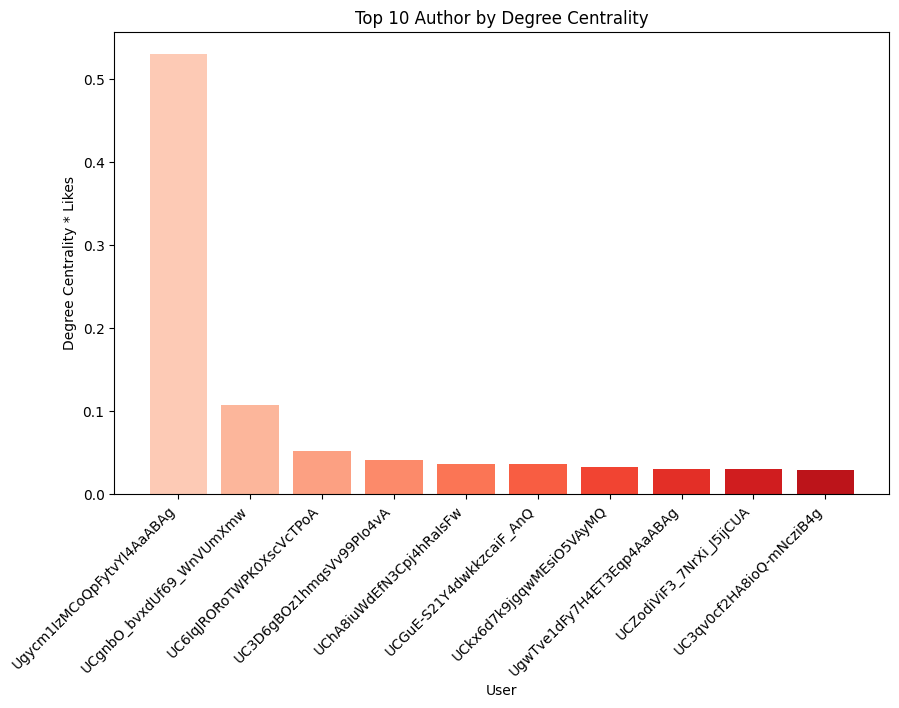

In [8]:
# Ambil 10 data degree centrality terbesar
top_users = df_degree_centrality.head(10)

# Konversi tipe data pada kolom 'User' menjadi string
top_users['User'] = top_users['User'].astype(str)

# Plot bar chart untuk data degree centrality teratas dengan gradasi warna salmon
cmap = plt.cm.get_cmap('Reds')
colors = cmap(np.linspace(0.2, 0.8, len(top_users)))
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(top_users['User'], top_users['Degree Centrality'], color=colors)
plt.title('Top 10 Author by Degree Centrality')
plt.xlabel('User')
plt.ylabel('Degree Centrality * Likes')
plt.xticks(rotation=45, ha='right')
plt.show()


In [9]:
# Inisialisasi graf
G = nx.from_pandas_edgelist(df, source='author_channel_id', target='parent_post_id', create_using=nx.DiGraph())

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Membuat DataFrame dari degree centrality
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['User', 'Degree Centrality'])

# Mengalikan dengan kolom 'likes'
df_degree_centrality['Degree Centrality'] *= df['likes']

# Mengurutkan hasil
df_degree_centrality.sort_values('Degree Centrality', ascending=False, inplace=True)
df_degree_centrality.reset_index(drop=True, inplace=True)

# Ganti nilai kolom 'User'
df_degree_centrality['User'] = [f'User {i}' for i in range(1, len(df_degree_centrality) + 1)]

# Menampilkan hasil
df_degree_centrality.head(10)


,User,Degree Centrality
0,User 1,0.530581
1,User 2,0.107543
2,User 3,0.051988
3,User 4,0.040775
4,User 5,0.036697
5,User 6,0.036188
6,User 7,0.032110
7,User 8,0.030581
8,User 9,0.030581
9,User 10,0.028542


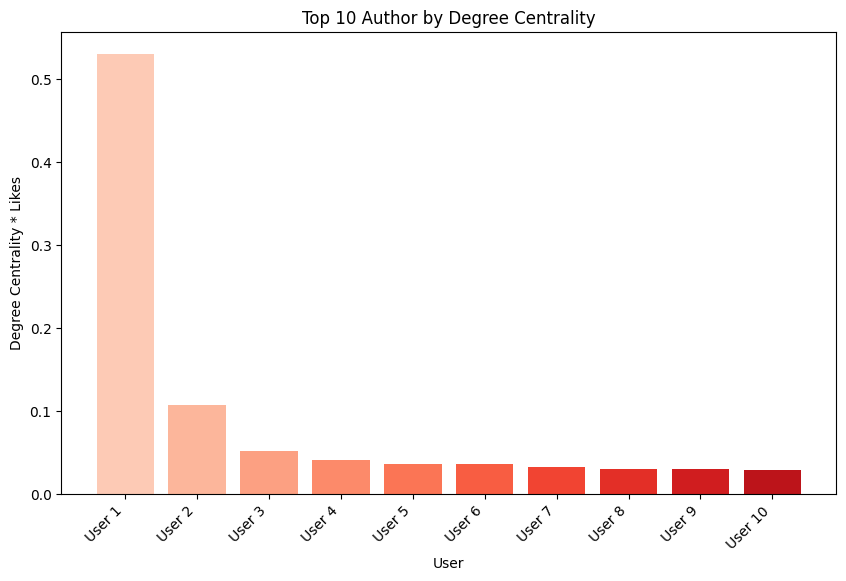

In [10]:
# Ambil 10 data degree centrality terbesar
top_users = df_degree_centrality.head(10)

# Konversi tipe data pada kolom 'User' menjadi string
top_users['User'] = top_users['User'].astype(str)

# Plot bar chart untuk data degree centrality teratas dengan gradasi warna salmon
cmap = plt.cm.get_cmap('Reds')
colors = cmap(np.linspace(0.2, 0.8, len(top_users)))
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(top_users['User'], top_users['Degree Centrality'], color=colors)
plt.title('Top 10 Author by Degree Centrality')
plt.xlabel('User')
plt.ylabel('Degree Centrality * Likes')
plt.xticks(rotation=45, ha='right')
plt.show()


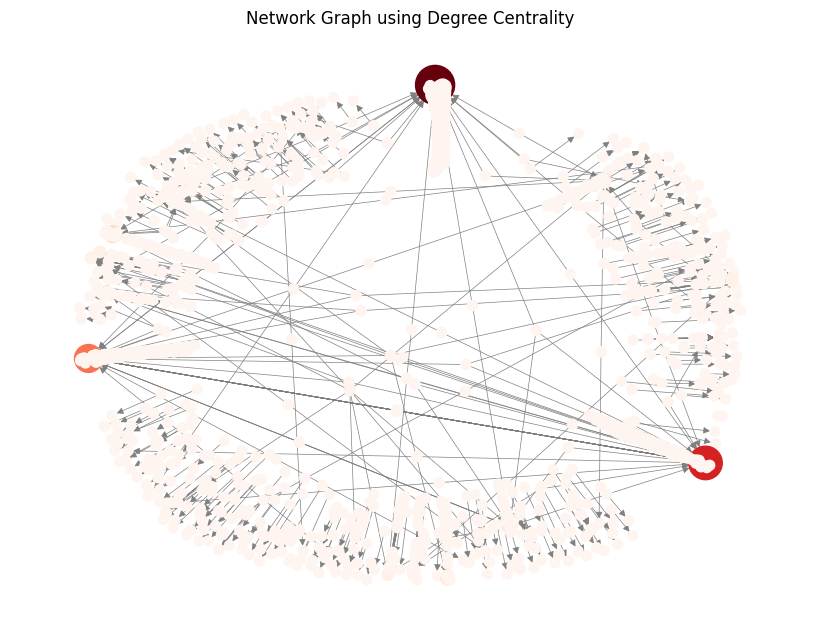

In [11]:
pos_fr = nx.spring_layout(G, seed=32)

scaled_node_sizes = [50 + 3000 * centrality for centrality in degree_centrality.values()]
edge_widths = [0.5 for _ in G.edges()]

plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos_fr,
    node_color=[v for v in degree_centrality.values()],
    node_size=scaled_node_sizes,
    cmap="Reds", 
    edge_color="gray",
    width=edge_widths,
    with_labels=False  
)

plt.title("Network Graph using Degree Centrality")
plt.axis("off")
plt.show()
